# 생존함수를 통한 거리에 따른 생존확률 구하기

In [107]:
#필요라이브러리

import numpy as np
import pandas as pd
from pandas import DataFrame
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [108]:
#가정한 심정지 데이터 불러오기

from lifelines.datasets import load_waltons #lib에 있는 waltion이라는 데이터를 가져오자
df = load_waltons() # returns a Pandas DataFrame

print(df.head())

T = df['T']
E = df['E']

      T  E    group
0   6.0  1  miR-137
1  13.0  1  miR-137
2  13.0  1  miR-137
3  13.0  1  miR-137
4  19.0  1  miR-137


# time을 [0,10]으로 scaling

1) 우리는 lib에서 가져온 data를 심정지가 발생한 데이터로 가정.

2) data를 [0.10]까지 관찰. 10 이후는 무조건 사망으로 간주했기 때문.

3) 따라서 10분 이내 데이터를 갖고 생존확률을 구하자

In [109]:
#우리가 필요한 data만 가져오기
X = np.array(T).reshape(-1, 1)
pd.DataFrame(X).describe() #원래 데이터의 요약통계

,0
count,163.000000
mean,49.613497
std,17.078007
min,6.000000
25%,41.000000
50%,56.000000
75%,61.000000
max,75.000000


In [112]:
#우리 프로젝트에 맞는 스케일로 조정하기

scaler = MinMaxScaler()
scaler.fit(X)
#스케일링코드
#사람시속을 2.35 m/sec로 조정하여 scaling

golden_time = 2
person_velocity = 2.5 #meter/sec

X_scaled = scaler.transform(X) * golden_time * person_velocity *60 
X_scaled[0] = 0.0001
np.mean(X_scaled), np.std(X_scaled)


(189.62390032008537, 74.02408640582736)

In [113]:
X_scaled

array([[1.00000000e-04],
       [3.04347826e+01],
       [3.04347826e+01],
       [3.04347826e+01],
       [5.65217391e+01],
       [5.65217391e+01],
       [5.65217391e+01],
       [8.69565217e+01],
       [8.69565217e+01],
       [8.69565217e+01],
       [8.69565217e+01],
       [8.69565217e+01],
       [1.17391304e+02],
       [1.17391304e+02],
       [1.78260870e+02],
       [2.43478261e+02],
       [2.43478261e+02],
       [1.30434783e+01],
       [1.30434783e+01],
       [1.30434783e+01],
       [3.91304348e+01],
       [3.91304348e+01],
       [6.95652174e+01],
       [6.95652174e+01],
       [6.95652174e+01],
       [6.95652174e+01],
       [1.00000000e+02],
       [1.00000000e+02],
       [1.00000000e+02],
       [1.00000000e+02],
       [1.00000000e+02],
       [1.30434783e+02],
       [1.30434783e+02],
       [1.60869565e+02],
       [1.17391304e+02],
       [2.08695652e+02],
       [2.08695652e+02],
       [2.39130435e+02],
       [2.39130435e+02],
       [2.39130435e+02],


# 카플란 마이어 곡선을 이용 (카플란 마이어 곡선은 생존을 개략적으로 보기 위해 고안된 곡선)

In [114]:
from lifelines import KaplanMeierFitter #카플란 마이어 곡선
kmf = KaplanMeierFitter()
kmf.fit(X_scaled, event_observed=E)  

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 163 total observations, 7 right-censored observations>

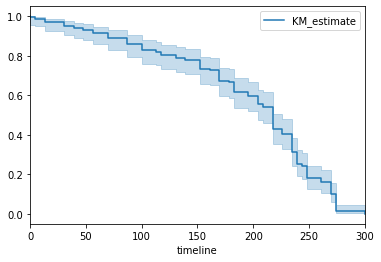

In [115]:
#생존률
kmf.plot_survival_function() 

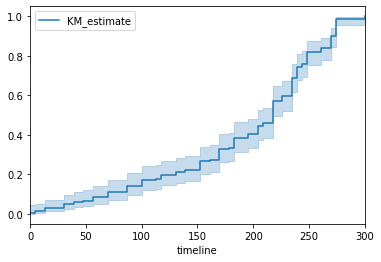

In [116]:
#사망률
kmf.plot_cumulative_density()

In [117]:
# 위 그래프를 개략적인 timeline
print(kmf.survival_function_)

            KM_estimate
timeline               
0.000000       1.000000
0.000100       0.993865
4.347826       0.987730
13.043478      0.969210
30.434783      0.950690
39.130435      0.938344
47.826087      0.932170
56.521739      0.913650
69.565217      0.888957
86.956522      0.858090
100.000000     0.827224
113.043478     0.821051
117.391304     0.802531
130.434783     0.790184
139.130435     0.777837
152.173913     0.734624
160.869565     0.728451
169.565217     0.672891
178.260870     0.666661
182.608696     0.616817
195.652174     0.598125
204.347826     0.554512
208.695652     0.542051
217.391304     0.429903
226.086957     0.404981
234.782609     0.311524
239.130435     0.254305
243.478261     0.240921
247.826087     0.180690
260.869565     0.160614
269.565217     0.100384
273.913043     0.014341
300.000000     0.000000


# 후보지와 강의실간 distance

In [239]:
#file load
data = pd.read_csv('./data/data.csv')
demand = data[:25]
candidate = data[25:]
distance_data = pd.DataFrame(np.ones((demand.shape[0],candidate.shape[0])),dtype="f")

def get_distance(x,y):

    result = abs(demand.iloc[x,1]-candidate.iloc[y,1])+abs(demand.iloc[x,2]-candidate.iloc[y,2])+abs(demand.iloc[x,3]-candidate.iloc[y,3])

    return result


for i in range(0,25):
    for j in range(0,40):
        distance_data.iloc[i,j] = get_distance(i,j)

distance_data.values

data.iloc[:data.shape[0],4].values

array([202., 274., 324., 516., 396.,  50., 533., 240.,   0., 464., 474.,
       333., 223., 506., 730.,  88.,  21., 152.,  64., 372., 465.,   0.,
         0., 326.,  44.,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan])

# 후보지와 강의실간 거리를 확률로 바꾸기

In [214]:
#predict(times: Union[Iterable[float], float], interpolate=False) → pandas.core.series.Series
import io
def dist_to_prob(distance_data, parameter):
    prob = DataFrame()
    for i in distance_data.columns :
        cand = np.array(parameter.predict(times = distance_data[i]))
        prob[i] = cand[:25]
    prob.to_csv(str(parameter) + '.csv')
    print('success save file to' + str(parameter))
    return prob

# D_i set 구하는 코드

In [240]:
D_b = distance_data.copy()
D_b[D_b > golden_time * person_velocity * 60] = 1
D_b[D_b <= golden_time * person_velocity * 60] = 0

# 시간이 특정 모수를 따른다 했을 때

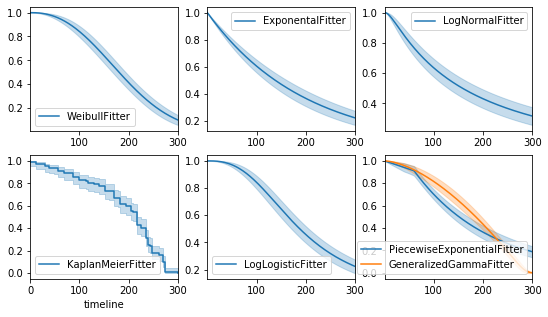

In [212]:
from lifelines import *

#분포 특성상 0인 data는 추정불가

fig, axes = plt.subplots(2, 3, figsize=(9, 5))
kmf = KaplanMeierFitter().fit(X_scaled, E, label='KaplanMeierFitter')
wbf = WeibullFitter().fit(X_scaled, E, label='WeibullFitter')
exf = ExponentialFitter().fit(X_scaled, E, label='ExponentalFitter')
lnf = LogNormalFitter().fit(X_scaled, E, label='LogNormalFitter')
llf = LogLogisticFitter().fit(X_scaled, E, label='LogLogisticFitter')
pwf = PiecewiseExponentialFitter([40, 60]).fit(X_scaled, E, label='PiecewiseExponentialFitter')
ggf = GeneralizedGammaFitter().fit(X_scaled, E, label='GeneralizedGammaFitter')

wbf.plot_survival_function(ax=axes[0][0])
exf.plot_survival_function(ax=axes[0][1])
lnf.plot_survival_function(ax=axes[0][2])
kmf.plot_survival_function(ax=axes[1][0])
llf.plot_survival_function(ax=axes[1][1])
pwf.plot_survival_function(ax=axes[1][2])
ggf.plot_survival_function(ax=axes[1][2])

In [215]:
dist_to_prob(distance_data, wbf)
dist_to_prob(distance_data, exf)
dist_to_prob(distance_data, lnf)
dist_to_prob(distance_data, kmf)
dist_to_prob(distance_data, llf)
dist_to_prob(distance_data, pwf)
dist_to_prob(distance_data, ggf)

success save file to<lifelines.WeibullFitter:"WeibullFitter", fitted with 163 total observations, 7 right-censored observations>
success save file to<lifelines.ExponentialFitter:"ExponentalFitter", fitted with 163 total observations, 7 right-censored observations>
success save file to<lifelines.LogNormalFitter:"LogNormalFitter", fitted with 163 total observations, 7 right-censored observations>
success save file to<lifelines.KaplanMeierFitter:"KaplanMeierFitter", fitted with 163 total observations, 7 right-censored observations>
success save file to<lifelines.LogLogisticFitter:"LogLogisticFitter", fitted with 163 total observations, 7 right-censored observations>
success save file to<lifelines.PiecewiseExponentialFitter:"PiecewiseExponentialFitter", fitted with 163 total observations, 7 right-censored observations>
success save file to<lifelines.GeneralizedGammaFitter:"GeneralizedGammaFitter", fitted with 163 total observations, 7 right-censored observations>


,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,1.000000,0.978610,1.000000,0.628380,0.550696,0.924226,0.981107,1.000000,0.973767,0.712949,...,0.782757,0.686723,0.739994,0.585374,0.987966,0.966246,0.856849,0.694900,0.752295,0.880421
1,0.987221,0.991055,0.990724,0.584561,0.503693,0.946182,0.992815,0.985284,0.956487,0.673099,...,0.746763,0.645573,0.754462,0.629160,0.987966,0.947481,0.825892,0.654147,0.752295,0.851393
2,0.973412,0.994812,0.978149,0.538901,0.454926,0.965148,0.994064,0.970875,0.936060,0.631300,...,0.708698,0.602512,0.716825,0.671054,0.977149,0.925707,0.792673,0.611473,0.721554,0.820017
3,1.000000,0.989852,1.000000,0.589634,0.509124,0.943833,0.985454,0.994577,0.971827,0.677726,...,0.750958,0.650347,0.723646,0.565895,0.960620,0.950675,0.829525,0.658876,0.682145,0.854812
4,0.986404,1.000000,0.983483,0.520777,0.435620,0.971609,1.000000,0.976745,0.944117,0.614640,...,0.693452,0.585374,0.701740,0.632077,0.991196,0.917642,0.779253,0.594482,0.725905,0.807289
5,0.835421,0.777172,0.845163,0.886182,0.834849,0.690549,0.802105,0.859682,0.909376,0.948493,...,0.980856,0.934460,0.863159,0.737096,0.971169,0.897614,0.987966,0.938922,0.666390,1.000000
6,0.702385,0.630639,0.714643,0.969341,0.935602,0.527332,0.661062,0.733088,0.798352,1.000000,...,0.975694,0.994398,0.954790,0.862813,0.820017,0.782535,0.919889,1.000000,0.872744,0.938491
7,0.661890,0.586796,0.674767,0.975721,0.944211,0.479306,0.618585,0.694176,0.763221,1.000000,...,0.958784,0.994422,0.954842,0.890981,0.683173,0.746426,0.894619,0.986624,0.960983,0.915438
8,0.704959,0.633435,0.717176,0.957599,0.920366,0.530405,0.663768,0.735557,0.723472,0.987913,...,0.937250,0.982584,0.973483,0.918189,0.683173,0.705673,0.864885,0.971536,0.960983,0.887914
9,0.739824,0.675138,0.751460,0.937349,0.895221,0.576395,0.704066,0.754129,0.684163,0.974331,...,0.914104,0.967409,0.987275,0.940866,0.641737,0.665455,0.834563,0.953792,0.961033,0.859547
